## Redkite Case Study

We would like you to tell us if ‘member get member’ (refer a friend) is good.

Attached are c.20k rows of obfuscated customer data from a rapidly growing food delivery company. They come from an aggregated customer analytics table and the data was extracted in mid 2016.

It’s up to you how you’d like to present your findings, whether it’s Powerpoint, Word, or some other preferred tool.

The brief is a little vague on purpose (e.g. you'll need to decide what “good” is for this business) as we'd like to see how you break down the problem and focus on what's important.

If you don't have enough data to make this call or if you think extra data sources would be beneficial to use, or you would like to consider other inputs or information, please outline what you'd add and how you'd use them.

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [325]:
# Read and view the data 
data = pd.read_csv('Sample Data - Case Study.csv')

print(data.shape)
data.head()

(25000, 14)


,user_id,first_order_day,most_used_city,count_cuisines,voucher_user,voucher_amount,member_get_member_viral,average_order_value,cnt_orders_7d_fwd,cnt_orders_14d_fwd,cnt_orders_30d_fwd,cnt_orders_60d_fwd,cnt_orders_90d_fwd,cnt_orders_6m_fwd
0,2509520,24/05/2016,Manchester,1,0,NaN,NaN,22.20,1,1,1,1,1,1
1,1388390,23/12/2015,London,1,0,NaN,NaN,97.20,1,1,1,1,1,1
2,4664154,27/06/2016,Manchester,1,1,10.0,1.0,35.28,1,1,1,1,1,1
3,3968328,28/05/2016,London,1,0,NaN,NaN,18.24,1,1,1,1,1,1
4,2255524,01/03/2016,London,1,0,NaN,NaN,83.04,3,3,3,4,4,5


In [326]:
# Explore the dataset 
print(data.info())
data.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  25000 non-null  int64  
 1   first_order_day          25000 non-null  object 
 2   most_used_city           25000 non-null  object 
 3   count_cuisines           25000 non-null  int64  
 4   voucher_user             25000 non-null  int64  
 5   voucher_amount           2199 non-null   float64
 6   member_get_member_viral  2199 non-null   float64
 7   average_order_value      25000 non-null  float64
 8   cnt_orders_7d_fwd        25000 non-null  int64  
 9   cnt_orders_14d_fwd       25000 non-null  int64  
 10  cnt_orders_30d_fwd       25000 non-null  int64  
 11  cnt_orders_60d_fwd       25000 non-null  int64  
 12  cnt_orders_90d_fwd       25000 non-null  int64  
 13  cnt_orders_6m_fwd        25000 non-null  int64  
dtypes: float64(3), int64(9

,user_id,count_cuisines,voucher_user,voucher_amount,member_get_member_viral,average_order_value,cnt_orders_7d_fwd,cnt_orders_14d_fwd,cnt_orders_30d_fwd,cnt_orders_60d_fwd,cnt_orders_90d_fwd,cnt_orders_6m_fwd
count,25000.00,25000.00,25000.00,2199.00,2199.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00
mean,2135903.17,2.30,0.09,8.42,0.16,32.79,1.25,1.42,1.76,2.28,2.73,3.84
std,1443230.42,2.26,0.28,4.34,0.37,20.23,0.82,1.21,1.89,3.03,4.01,6.71
min,1988.00,0.00,0.00,2.50,0.00,3.12,1.00,1.00,1.00,1.00,1.00,1.00
25%,828961.50,1.00,0.00,10.00,0.00,21.94,1.00,1.00,1.00,1.00,1.00,1.00
50%,1865581.00,1.00,0.00,10.00,0.00,28.04,1.00,1.00,1.00,1.00,1.00,2.00
75%,3280115.50,3.00,0.00,10.00,0.00,37.07,1.00,1.00,2.00,2.00,3.00,4.00
max,5220624.00,29.00,1.00,50.00,1.00,545.10,23.00,34.00,43.00,79.00,86.00,173.00


In [327]:
# Check if there are any duplicates in the dataset
data.duplicated().sum()

0

In [328]:
# How many have used the member_get_member scheme? 
data['member_get_member_viral'].value_counts()

0.0    1843
1.0     356
Name: member_get_member_viral, dtype: int64

[Text(0.5, 1.0, 'Referral vs No Referral')]

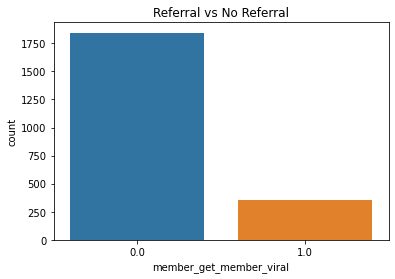

In [329]:
# Visualise how many used the referral scheme
sns.countplot(x='member_get_member_viral', data = spending_data).set(title = 'Referral vs No Referral')

### How much does the 'member get member' referral scheme cost the company?

In [330]:
# Drop the columns that you do not need. 
data_vouchers = data.drop(['user_id', 'first_order_day', 'most_used_city', 'count_cuisines', 'average_order_value',
                           'cnt_orders_7d_fwd', 'cnt_orders_14d_fwd', 'cnt_orders_30d_fwd', 'cnt_orders_60d_fwd',
                           'cnt_orders_90d_fwd', 'cnt_orders_6m_fwd'], axis = 1)

data_vouchers.dropna(inplace=True)

# Get all the customers who used the member_get_member voucher 
data_vouchers = data_vouchers[data_vouchers['member_get_member_viral'] == 1].reset_index()

print(data_vouchers.shape)
data_vouchers

(356, 4)


,index,voucher_user,voucher_amount,member_get_member_viral
0,2,1,10.0,1.0
1,176,1,10.0,1.0
2,205,1,10.0,1.0
3,213,1,10.0,1.0
4,222,1,10.0,1.0
...,...,...,...,...
351,24626,1,10.0,1.0
352,24648,1,10.0,1.0
353,24768,1,10.0,1.0
354,24792,1,10.0,1.0


In [331]:
# Check the values in each column 
print(data_vouchers['voucher_user'].value_counts())
print(data_vouchers['voucher_amount'].value_counts())
print(data_vouchers['member_get_member_viral'].value_counts())

1    356
Name: voucher_user, dtype: int64
10.0    356
Name: voucher_amount, dtype: int64
1.0    356
Name: member_get_member_viral, dtype: int64


In [332]:
# Work out how much the scheme is costing the company 
# For each referal assume £10 for both partis, so a total of £20 
total_cost = data['member_get_member_viral'].sum()*20

print(f'The total cost of running the member to member referral scheme is £{total_cost}')

The total cost of running the member to member referral scheme is £7120.0


### How much revenue has been generated by 'member get member' scheme users? 

In [333]:
# Create a new DataFrame and drop the columns that you do not need. 
data_vouchers_2 = data.drop(['user_id', 'first_order_day', 'most_used_city', 'count_cuisines'], axis = 1)

data_vouchers_2.dropna(inplace=True)

# Get all the customers who used the member_get_member voucher 
data_vouchers_2 = data_vouchers_2[data_vouchers_2['member_get_member_viral'] == 1].reset_index()

print(data_vouchers_2.shape)
data_vouchers_2.head()

(356, 11)


,index,voucher_user,voucher_amount,member_get_member_viral,average_order_value,cnt_orders_7d_fwd,cnt_orders_14d_fwd,cnt_orders_30d_fwd,cnt_orders_60d_fwd,cnt_orders_90d_fwd,cnt_orders_6m_fwd
0,2,1,10.0,1.0,35.28,1,1,1,1,1,1
1,176,1,10.0,1.0,19.02,1,1,1,1,1,1
2,205,1,10.0,1.0,30.00,1,1,1,1,1,1
3,213,1,10.0,1.0,18.36,1,1,1,1,1,1
4,222,1,10.0,1.0,21.54,1,1,1,1,1,1


In [334]:
# Calculate revnue generated by those using the scheme
total_revenue = data_vouchers_2['average_order_value']*data_vouchers_2['cnt_orders_6m_fwd']

total_revenue_fig = total_revenue.sum().round(2)

print(f'The total revenue brought in by customers who used the "member-get-member" scheme is £{total_revenue_fig}')

The total revenue brought in by customers who used the "member-get-member" scheme is £12642.48


In [335]:
# Calculate profit 
total_profit = (total_revenue_fig) - (total_cost)

print(f'The scheme has brought in a total profit of £{total_profit}')

The scheme has brought in a total profit of £5522.48


### At what point do the company break even? 

In [336]:
# Calculate revnue generated by those using the scheme after 2 months
total_revenue_2m = data_vouchers_2['average_order_value']*data_vouchers_2['cnt_orders_60d_fwd']

total_revenue_2m_fig = total_revenue_2m.sum().round(2)

print(f'The total revenue brought in by customers who used the "member-get-member" scheme \
after 2 months is £{total_revenue_2m_fig}')

The total revenue brought in by customers who used the "member-get-member" scheme after 2 months is £12531.31


In [337]:
# Calculate revnue generated by those using the scheme after 7 days
total_revenue_7d = data_vouchers_2['average_order_value']*data_vouchers_2['cnt_orders_7d_fwd']

total_revenue_7d_fig = total_revenue_7d.sum().round(2)

print(f'The total revenue brought in by customers who used the "member-get-member" scheme \
after 7 days is £{total_revenue_7d_fig}')

The total revenue brought in by customers who used the "member-get-member" scheme after 7 days is £10268.87


Within 1 week of customers using the member-get-member referral code, the company has covered its costs and made a profit of £3,148.87. 

They get a return on their investment in under a week. 

### How is the member-get-member scheme is performing by month 

In [339]:
data_monthly = data.drop(['user_id','most_used_city', 'count_cuisines',
                          'cnt_orders_7d_fwd', 'cnt_orders_14d_fwd', 'cnt_orders_30d_fwd',
                          'cnt_orders_60d_fwd', 'cnt_orders_90d_fwd', 'cnt_orders_6m_fwd',
                          'voucher_user', 'average_order_value','voucher_amount'], axis = 1)

data_monthly.dropna(inplace=True)

# Get all the customers who used the member_get_member voucher 
data_monthly = data_monthly[data_monthly['member_get_member_viral'] == 1].reset_index()

print(data_monthly.shape)
data_monthly

(356, 3)


,index,first_order_day,member_get_member_viral
0,2,27/06/2016,1.0
1,176,19/04/2016,1.0
2,205,01/07/2016,1.0
3,213,10/05/2016,1.0
4,222,16/07/2016,1.0
...,...,...,...
351,24626,29/04/2016,1.0
352,24648,04/06/2016,1.0
353,24768,30/04/2016,1.0
354,24792,09/07/2016,1.0


In [340]:
# Change date column to datetime format 
pd.to_datetime(data_monthly['first_order_day'])

0     2016-06-27
1     2016-04-19
2     2016-01-07
3     2016-10-05
4     2016-07-16
         ...    
351   2016-04-29
352   2016-04-06
353   2016-04-30
354   2016-09-07
355   2016-07-13
Name: first_order_day, Length: 356, dtype: datetime64[ns]

In [341]:
# Create new columns to group the data 
data_monthly['month'] = pd.DatetimeIndex(data_monthly['first_order_day']).month 
data_monthly['year'] = pd.DatetimeIndex(data_monthly['first_order_day']).year

data_monthly.head()

,index,first_order_day,member_get_member_viral,month,year
0,2,27/06/2016,1.0,6,2016
1,176,19/04/2016,1.0,4,2016
2,205,01/07/2016,1.0,1,2016
3,213,10/05/2016,1.0,10,2016
4,222,16/07/2016,1.0,7,2016


In [342]:
# Group the data by month 
data_monthly_grouped = data_monthly.groupby(['month','year']).sum().reset_index()

data_monthly_grouped

,month,year,index,member_get_member_viral
0,1,2016,143627,14.0
1,2,2016,160370,12.0
2,3,2016,122960,12.0
3,4,2016,576019,43.0
4,5,2016,663551,56.0
5,6,2016,1281338,99.0
6,7,2016,684459,56.0
7,8,2016,178066,17.0
8,9,2016,156827,11.0
9,10,2016,189501,15.0


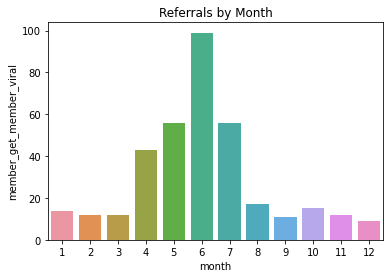

In [343]:
# Visualise the number of referrals used by month 
sns.barplot(x='month', y='member_get_member_viral', data=data_monthly_grouped).set(title='Referrals by Month')

plt.savefig('Referrals by Month.png')

From the graph above, it is clear that member_get_member referral scheme is most popular in late spring - early summer and seems to slow down in the autumn and winter.

This is data from 2016 alone so we must be careful with generalising all years as having the same trends. Some additional data around take up in 2015 and 2017 would be helpful in identifying seasonal trends. 

### In which city is it being used most?

In [345]:
data_city = data.drop(['user_id','first_order_day', 'count_cuisines',
                          'cnt_orders_7d_fwd', 'cnt_orders_14d_fwd', 'cnt_orders_30d_fwd',
                          'cnt_orders_60d_fwd', 'cnt_orders_90d_fwd', 'cnt_orders_6m_fwd',
                          'voucher_user', 'average_order_value','voucher_amount'], axis = 1)

data_city.dropna(inplace=True)

# Get all the customers who used the member_get_member voucher 
data_city = data_city[data_city['member_get_member_viral'] == 1].reset_index()

print(data_city.shape)
data_city

(356, 3)


,index,most_used_city,member_get_member_viral
0,2,Manchester,1.0
1,176,London,1.0
2,205,London,1.0
3,213,London,1.0
4,222,Manchester,1.0
...,...,...,...
351,24626,London,1.0
352,24648,London,1.0
353,24768,London,1.0
354,24792,London,1.0


In [346]:
# Apply groupby() to the dataset  
data_city = data_city.groupby('most_used_city').sum().reset_index()

# View the data frame
data_city

,most_used_city,index,member_get_member_viral
0,Aberdeen,30308,4.0
1,London,3382013,271.0
2,Manchester,997933,81.0


London is clearly the most popular place for this scheme and so the company may wish to focus efforts here or bolster efforts elsewhere depending on marketing strategy and wider company objectives. 

It could be argued that the member_get_member scheme is a 'good' thing in London based on its popularity but not necessarily as 'good' in Aberdeen. 

This data can help inform the marketing team's strategy. 

### Do those who use the 'member get member' code spend more than those who do not?

In [350]:
# Create new data frame with only columns you need
spending_data = data.drop(['user_id','first_order_day', 'most_used_city', 'count_cuisines',
                          'cnt_orders_7d_fwd', 'cnt_orders_14d_fwd', 'cnt_orders_30d_fwd',
                          'cnt_orders_60d_fwd', 'cnt_orders_90d_fwd', 'cnt_orders_6m_fwd',
                          'voucher_user', 'voucher_amount'], axis = 1)

# Drop the empty rows 
spending_data.dropna(subset=['member_get_member_viral'], inplace=True)

# Reset the index 
spending_data = spending_data.reset_index()

# View output 
print(spending_data.shape)
spending_data.head()

(2199, 3)


,index,member_get_member_viral,average_order_value
0,2,1.0,35.280
1,36,0.0,9.660
2,53,0.0,19.200
3,55,0.0,26.586
4,71,0.0,21.180


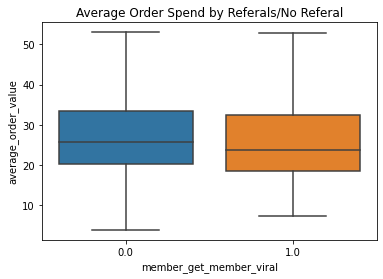

In [351]:
# Visualise the difference in spending based on whether customer used referral or not. 
spending_boxplot = sns.boxplot(x='member_get_member_viral', y='average_order_value', data=spending_data, 
                               showfliers= False).set(title='Average Order Spend by Referals/No Referal')

plt.savefig('spending_boxplot.png')

The comparative boxplot here shows that the data is distributed very similarly and shows no great difference between the spending behaviour of those who use a referral versus those who do not. 

The spending average is slightly higher for those who did not use the code versus those who did, but largely most of the data overlaps. 

Based on these results we can conclude that using the referal code does not necessarily lead to higher or lower spending.

If we wished to go one step further, we could check whether the difference here is statistically significant. 

### Do those who use the 'member get member' code order more than those who do not?

In [352]:
# Create new data frame with only columns you need
order_data = data.drop(['user_id', 'average_order_value', 'first_order_day', 'most_used_city', 'count_cuisines', 
                        'cnt_orders_7d_fwd', 'cnt_orders_14d_fwd', 'cnt_orders_30d_fwd', 'cnt_orders_60d_fwd', 
                        'cnt_orders_90d_fwd', 'voucher_user', 'voucher_amount'], axis = 1)

# Drop the empty rows 
order_data.dropna(subset=['member_get_member_viral'], inplace=True)

# View shape
print(order_data.shape)

(2199, 2)


In [353]:
# Create two separate data sets to see each one's descriptive analytics 
# Create data set for customers who used the referral 
order_data_1 = order_data[order_data['member_get_member_viral'] == 1]

order_data_1.describe()

,member_get_member_viral,cnt_orders_6m_fwd
count,356.0,356.000000
mean,1.0,1.359551
std,0.0,1.100547
min,1.0,1.000000
25%,1.0,1.000000
50%,1.0,1.000000
75%,1.0,1.000000
max,1.0,12.000000


In [354]:
# Create data set for customers who did not use the referral 
order_data_0 = order_data[order_data['member_get_member_viral'] == 0]

order_data_0.describe()

,member_get_member_viral,cnt_orders_6m_fwd
count,1843.0,1843.000000
mean,0.0,2.608247
std,0.0,3.959153
min,0.0,1.000000
25%,0.0,1.000000
50%,0.0,1.000000
75%,0.0,2.500000
max,0.0,69.000000


The statistics above show the differences between those who use the referral and those who do not. 

The data for those who use the referral is a lot more squeezed around 1 order, with Q1, Q2, Q3 all being 1. This could be because those who receive a code may use it once to redeem the discount and not use the app again, or may not use it consistently. 

The data is more varied in the case of those who do not use the referral code. The mean is double at 2.6 and the max value of 69 is far greater than for those who did use the referral (at 12). 